Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Mathias Linsel"
COLLABORATORS = "Marcus Culemann, Andreas Burger, Hannah Lange"

---

## 1 Bias vs variance trade-off
In this lecture we have discussed two schematic plots:  
· Number of data points vs. Error.  
· Model complexity vs. Error.  
Perform an experiment with polynomials which shows this behaviour. To do this you just need to follow the instructions below:

In [2]:
# Import necessary libraries
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#%matplotlib notebook

In [3]:
# We define a polynomial that we want to work with
poly = lambda x: 7.2 - 3.1 * x + 20 * x**3 - 1.3 * x**4 + 0.2 * x**5

# training and testing data
def create_data(npoints, sigma):
    x = np.linspace(-7, 8, npoints)
    # use sklearn for easy splitting of data, default is 25% test data
    x = train_test_split(x)
    xtest = x[1]
    xtrain = x[0]
    # add Gaussian noise
    ytrain = poly(xtrain) + np.random.normal(0, sigma, xtrain.size)
    ytest = poly(xtest) + np.random.normal(0, sigma, xtest.size)
    return [xtrain, ytrain, xtest, ytest]


# Seed random generator for repeatable results
np.random.seed(11041991)

# Noise on data
sigma = 500

# Create a dataset
data = create_data(100, sigma)

#### Complexity vs. Error
create a model of varying complexity (polynomial degrees) to fit the data and plot Error vs. model complexity

In [4]:
# complexity vs. error

# Fit a linear regression model of given complexity (here: polynomial degree deg) to the given dataset and 
# return predictions for training and test set
def fit_model(data, deg):
    
    poly = PolynomialFeatures(deg)
    xFit1 = poly.fit_transform(data[0][:,np.newaxis])
    xFit2 = poly.fit_transform(data[2][:,np.newaxis])
    model = linear_model.LinearRegression()
    model.fit(xFit1, data[1])
    train_prediction = model.predict(xFit1)
    test_prediction = model.predict(xFit2)
    
    return [data[0], train_prediction , data[2], test_prediction]

In [5]:
# your code is autograded in this cell

To properly plot the out_of_sample error, we have to average about a couple of fit instances for each polynomial degree on different datasets (calling the create_dataset function in a loop). Use mean squared error (sklearn.metrics.mean_squared_error) to calculate the out of sample error. Store the average MSE for each polynomial degree in the list E_out. 

In [6]:
degrees = range(3,12) # degrees aka complexity of model 
num_rep = 500 # number of repetitions to calculate the mean error from 

E_out = []

for deg in degrees:
    mse = 0
    for i in range(num_rep):
        dataset = create_data(100, sigma)
        fit = fit_model(dataset, deg)
        mse += metrics.mean_squared_error(dataset[3], fit[3])
    mse /= num_rep
    E_out = np.append(E_out, [mse])


In [7]:
print(E_out)

[ 347811.48529272  313220.00767232  274826.36304052  281269.51909343
  276692.19063497  294379.96916052  306362.35833005  302507.36487324
  372969.22354323]


In [8]:
# your code is autograded in this cell


Now visualize your results using a scatter plot with the complexity (polynomial degree of the fitting function) on the x-axis and the out-of-sample error on the y-axis:

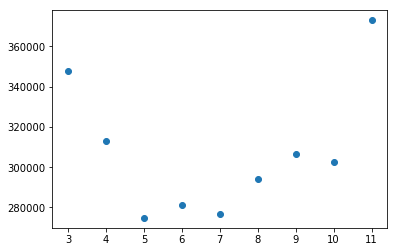

In [9]:
#plotting your results
xlabel = 'Model Complexity'
ylabel = 'MSE'
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(degrees, E_out)
plt.show()

In [10]:
# your code is autograded in this cell
from plotchecker import ScatterPlotChecker
pc = ScatterPlotChecker(ax)
pc.assert_x_data_equal(degrees)
pc.assert_y_data_equal(E_out)

ModuleNotFoundError: No module named 'plotchecker'

### Number of data points vs. Error
To show how the error depends on the number of datapoints, we use fit_model to fit datasets of varying size and then plot training and test error vs. the number of datapoints used to generate the fit of fixed complexity. Same as before, average the errors over a couple of repetitions to get a smoother result.

In [11]:
Nmin = 35 # minimum points in dataset
Nmax = 100 #maximal points in dataset

degree = 5 # polynomial degree of the model

num_rep = 100 # number of repetitions to loop over

E_out = []
E_in = []

for ndata in range(Nmin, Nmax):
    mse_in = 0
    mse_out = 0
    for i in range(num_rep):
        dataset = create_data(ndata, sigma)
        fit = fit_model(dataset, degree)
        mse_in += metrics.mean_squared_error(dataset[1], fit[1])
        mse_out += metrics.mean_squared_error(dataset[3], fit[3])
    mse_in /= num_rep
    mse_out /= num_rep
    E_in = np.append(E_in, [mse_in])
    E_out = np.append(E_out, [mse_out])

In [12]:
print(E_out)
print(len(E_out))

print(E_in)
print(len(E_in))

[ 391381.77556993  343126.88220052  418492.99960732  331347.19717257
  357270.94639375  308404.31240293  325705.98241995  348804.62624267
  322445.55752471  353667.56717511  375722.48156455  322927.64155614
  320908.67511241  313854.01586645  307233.23219302  306277.76498483
  320448.29540122  307450.44711894  332726.69865301  307212.19060584
  303702.52042293  290647.25621326  283394.74027276  288484.0484134
  304097.82389194  303220.57169481  288008.49921323  295770.48979483
  287612.78858943  274246.11671343  288173.61939419  279842.01053653
  316576.2233352   291013.31376603  292551.84134494  284195.30262103
  269273.33331532  281826.86542638  298369.75411258  282816.57148494
  286180.64823943  272283.0914544   283788.71887614  289633.90197132
  268117.66569873  271990.95719594  293719.28574207  269333.89598215
  272815.37923388  285947.74400044  273923.840024    282626.51583176
  274974.68119177  287178.15088977  264034.88807087  272502.69437967
  291816.08084664  258637.68697007 

In [13]:
# your code is autograded in this cell


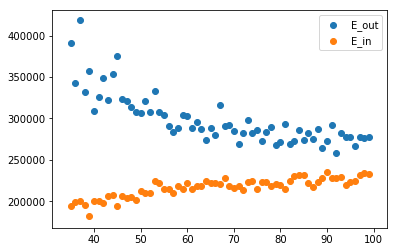

In [14]:
#plotting your results
xlabel = 'Number of datapoints'
ylabel = 'MSE'
fig = plt.figure()
ax2 = fig.add_subplot(111)

plt.scatter(list(range(Nmin, Nmax)), E_out, label='E_out')
plt.scatter(list(range(Nmin, Nmax)), E_in, label='E_in')
plt.legend()
plt.show()



In [15]:
# your code is autograded in this cell
pc = ScatterPlotChecker(ax2)
x_data = list(range(Nmin, Nmax))
x_data.extend(x_data)
pc.assert_x_data_allclose(x_data)
y_data = E_out
y_data.extend(E_in)
pc.assert_y_data_allclose(y_data)


NameError: name 'ScatterPlotChecker' is not defined